In [1]:
import tensorflow as tf

2025-09-02 12:14:48.133424: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


# 합성곱 신경망의 구조

In [ ]:
from tensorflow.keras.datasets import mnist # mnist는 손글씨 숫자 이미지 데이터임
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train.shape, X_test.shape

((60000, 28, 28), (10000, 28, 28))

In [ ]:
X_train = X_train.reshape(-1, 28,28,1)/255.0 #(배치수, 높이, 너비, 채널)
# 배치수 -1은 자동계산 = 60,000
# 흑백이미지는 채널 1, 컬러는 3
X_test = X_test.reshape(-1,28,28,1)/255.0
X_train.shape, X_test.shape
# 픽셀 값 범위가 원래 0~255 (정수)였는데, 255로 나누어 0~1 사이의 실수로 정규화 -> 신경망 학습이 훨씬 안정적이고 빠르게 진행됨

((60000, 28, 28, 1), (10000, 28, 28, 1))

In [ ]:
from tensorflow.keras import Sequential, layers
model = Sequential(
    [
    layers.Input(shape=(28,28,1)), # 3차원 이미지 1장의 입력
    layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu' ),
    # Conv2D(32, 3×3): 32개의 3×3 필터로 특징 추출 (엣지, 패턴 등)
    layers.MaxPooling2D(), # default 2*2
    # MaxPooling2D(2×2): 특징 맵 크기를 절반으로 줄임
    layers.Dropout(0.1),
    
    layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu' ), 
    layers.MaxPooling2D(),
    layers.Dropout(0.25),
    
    layers.Flatten(),
    # Flatten: 2D 특징맵 → 1D 벡터로 펼침
    layers.Dense(128, activation='relu'), # 분류 계층
    # Dense(128, ReLU): 1차원으로 펼친 n개의 특징을 128개 노드로 압축,조합
    layers.Dropout(0.5),
    layers.Dense(10, activation='softmax') # 출력 계층
    # Dense(10, Softmax): 128개의 특징을 이용해 최종 10개의 클래스 확률 출력 (0~9 숫자)
    # 128개 특징을 이용해 최종 10가지 종류(0~9 숫자)로 분류하는 단계
        ]

)

I0000 00:00:1756794032.397896    4626 gpu_device.cc:2020] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 5563 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 4060 Laptop GPU, pci bus id: 0000:01:00.0, compute capability: 8.9


In [12]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 225,034 (879.04 KB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

In [13]:
# model setting
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy']
    )

In [19]:
# 모델 학습
model.fit(X_train, y_train, batch_size=128, epochs=10, verbose=1)

Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.8438 - loss: 0.5152
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9564 - loss: 0.1494
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9669 - loss: 0.1134
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9714 - loss: 0.0955
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ -1s -1422us/step - accuracy: 0.9750 - loss: 0.0832
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9779 - loss: 0.0750
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9801 - loss: 0.0675
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9810 - loss: 0.0617
Epoch 9/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9834 - loss: 0.0567
Epoch 10/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9837 - loss: 0.0531


In [20]:
# 모델 평가
model.evaluate(X_test, y_test, verbose=0)

[0.02216131053864956, 0.9929999709129333]

# Resnet 가져오기

In [ ]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import decode_predictions
import numpy as np

model = ResNet50(weights='imagenet') # 첫실행시가중치다운로드됨
# https://commons.wikimedia.org/wiki/File:YellowLabradorLooking_new.jpg

img= image.load_img('YellowLabradorLooking_new.jpg',target_size=(224, 224))
x = image.img_to_array(img) # x.shape=(224,224,3)
x = np.expand_dims(x, axis=0) # x.shape=(1,244,244,3)
pred = model.predict(x, verbose=0)
print('Predicted:', decode_predictions(pred, top=3))

Predicted: [[('n02099712', 'Labrador_retriever', np.float32(0.26847023)), ('n02108089', 'boxer', np.float32(0.1510946)), ('n02099849', 'Chesapeake_Bay_retriever', np.float32(0.10792644))]]


# 테스트용 

In [29]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import decode_predictions
import numpy as np

model = ResNet50(weights='imagenet') # 첫실행시가중치다운로드됨
# https://commons.wikimedia.org/wiki/File:YellowLabradorLooking_new.jpg

img= image.load_img('golden.jpg',target_size=(224, 224))
x = image.img_to_array(img) # x.shape=(224,224,3)
x = np.expand_dims(x, axis=0) # x.shape=(1,244,244,3)
pred = model.predict(x, verbose=0)
print('Predicted:', decode_predictions(pred, top=3))

Predicted: [[('n02808304', 'bath_towel', np.float32(0.17116381)), ('n02111889', 'Samoyed', np.float32(0.10848193)), ('n02111500', 'Great_Pyrenees', np.float32(0.09416062))]]


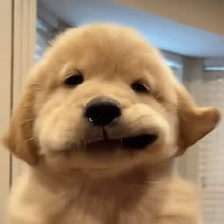

In [ ]:
img
# 목욕타월..?

In [ ]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten

resnet_model= ResNet50(input_shape=(224,224,3),include_top=False)
resnet_model.traiable= True
model = Sequential()
model.add(resnet_model) 
model.add(Flatten())
model.add(Dense(1024, activation='relu')) # FC 층추가
model.add(Dense(3, activation='softmax')) # 3개클래스분류
model.summary()

94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ resnet50 (Functional)           │ (None, 7, 7, 2048)     │    23,587,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 100352)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1024)           │   102,761,472 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 3)              │         3,075 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 126,352,259 (482.00 MB)

 Trainable params: 126,299,139 (481.79 MB)

 Non-trainable params: 53,120 (207.50 KB)

# 전이학습 : 출력층을 바꾼다
include_top = False
마지막 출력층의 값을 3개로 설정

## 분류모델 추가하기

In [32]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten

resnet_model= ResNet50(input_shape=(224,224,3),include_top=False)
resnet_model.traiable= True

model = Sequential()
model.add(resnet_model)

model.add(Flatten())
model.add(Dense(1024, activation='relu')) # FC 층추가
model.add(Dense(3, activation='softmax')) # 3개클래스분류
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ resnet50 (Functional)           │ (None, 7, 7, 2048)     │    23,587,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 100352)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1024)           │   102,761,472 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 3)              │         3,075 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 126,352,259 (482.00 MB)

 Trainable params: 126,299,139 (481.79 MB)

 Non-trainable params: 53,120 (207.50 KB)

In [34]:
import zipfile   
file_path = 'glaucoma.zip'
with zipfile.ZipFile(file_path, 'r') as f:
    f.extractall('./datasets')

In [39]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_gen = ImageDataGenerator(rotation_range=20,
                               width_shift_range=0.2, height_shift_range=0.2,
                               horizontal_flip=True)
train_data = train_gen.flow_from_directory('./datasets/glaucoma/train', target_size=(224,224),
                                           batch_size=32, class_mode='sparse')

test_gen = ImageDataGenerator()
test_data = test_gen.flow_from_directory('./datasets/glaucoma/test', target_size=(224,224),
                                         batch_size=32, class_mode='sparse')

Found 1394 images belonging to 3 classes.


Found 150 images belonging to 3 classes.


In [40]:
# model setting
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy']
    )

In [42]:
# 모델학습
model.fit(train_data, validation_data=test_data, epochs=20)

Epoch 1/20
36/44 ━━━━━━━━━━━━━━━━━━━━ 1s 209ms/step - accuracy: 0.5696 - loss: 40.1737

2025-09-02 16:31:00.408600: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_16168', 4 bytes spill stores, 4 bytes spill loads

2025-09-02 16:31:00.789681: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_16038', 56 bytes spill stores, 56 bytes spill loads



39/44 ━━━━━━━━━━━━━━━━━━━━ 3s 672ms/step - accuracy: 0.5742 - loss: 38.2903

/home/devuser/miniconda3/envs/tf_cuda_env/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()
2025-09-02 16:31:17.839448: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_1712', 56 bytes spill stores, 56 bytes spill loads



44/44 ━━━━━━━━━━━━━━━━━━━━ 64s 707ms/step - accuracy: 0.6413 - loss: 13.6071 - val_accuracy: 0.2933 - val_loss: 1.3769
Epoch 2/20
44/44 ━━━━━━━━━━━━━━━━━━━━ 10s 215ms/step - accuracy: 0.7109 - loss: 0.7273 - val_accuracy: 0.3600 - val_loss: 1.4717
Epoch 3/20
44/44 ━━━━━━━━━━━━━━━━━━━━ 10s 216ms/step - accuracy: 0.7174 - loss: 0.8014 - val_accuracy: 0.6000 - val_loss: 1.7316
Epoch 4/20
44/44 ━━━━━━━━━━━━━━━━━━━━ 7s 160ms/step - accuracy: 0.7260 - loss: 0.6560 - val_accuracy: 0.6667 - val_loss: 0.7092
Epoch 5/20
44/44 ━━━━━━━━━━━━━━━━━━━━ 10s 214ms/step - accuracy: 0.7504 - loss: 0.5596 - val_accuracy: 0.6600 - val_loss: 0.9126
Epoch 6/20
44/44 ━━━━━━━━━━━━━━━━━━━━ 10s 218ms/step - accuracy: 0.7597 - loss: 0.5453 - val_accuracy: 0.7000 - val_loss: 0.7459
Epoch 7/20
44/44 ━━━━━━━━━━━━━━━━━━━━ 10s 214ms/step - accuracy: 0.7568 - loss: 0.6553 - val_accuracy: 0.5667 - val_loss: 3.9778
Epoch 8/20
44/44 ━━━━━━━━━━━━━━━━━━━━ 7s 213ms/step - accuracy: 0.7819 - loss: 0.5270 - val_accuracy: 0.7467

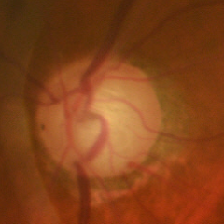

In [47]:
from tensorflow.keras.preprocessing import image
img = image.load_img('./datasets/glaucoma/test/test.png', target_size=(224, 224))
img

In [49]:
from tensorflow.keras.applications.resnet50 import decode_predictions

x = image.img_to_array(img).reshape(-1, 224, 224, 3)
# x = np.expand_dims(x, axis=0)
pred = model.predict(x, verbose=0)
pred

array([[0.56746453, 0.30964246, 0.12289299]], dtype=float32)